## Springboard Grader - Below are the directions that were part of this assignment, it specifically states "brief writeup" and "no more than one page". 

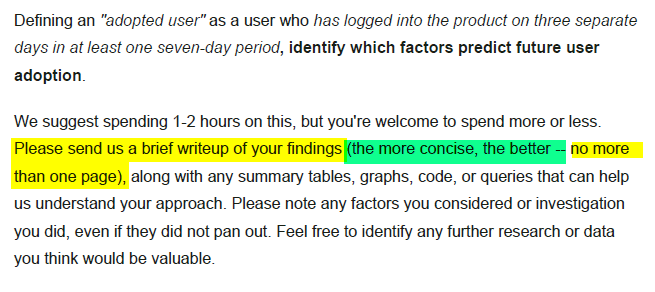

#### Relax Inc. Take-Home Challenge

#### From the assignment directions: “Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption .”

#### In python we can implement this logic as follows.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data
users = pd.read_excel("takehome_users.xlsx", header=0)
engagement = pd.read_excel("takehome_user_engagement.xlsx", header=0)

In [4]:
# Convert timestamps to datetime
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

In [7]:
from datetime import timedelta
# From the assignment: Defining an "adopted user" as a user who has logged into the product on three separate
# days in at least one seven day period , identify which factors predict future user adoption .
def adopted_user(user):
    user_engagement = engagement[engagement['user_id'] == user['object_id']]
    if len(user_engagement) < 3:
        return False
    user_engagement = user_engagement.set_index('time_stamp')
    user_engagement = user_engagement.resample('D').count()['user_id']
    for i in range(len(user_engagement)-2):
        if user_engagement[i] >= 1 and user_engagement[i+1] >= 1 and user_engagement[i+2] >= 1:
            # Check if there are three logins within a seven-day period
            if (user_engagement.index[i+2] - user_engagement.index[i]).days <= 7:
                return True
    return False

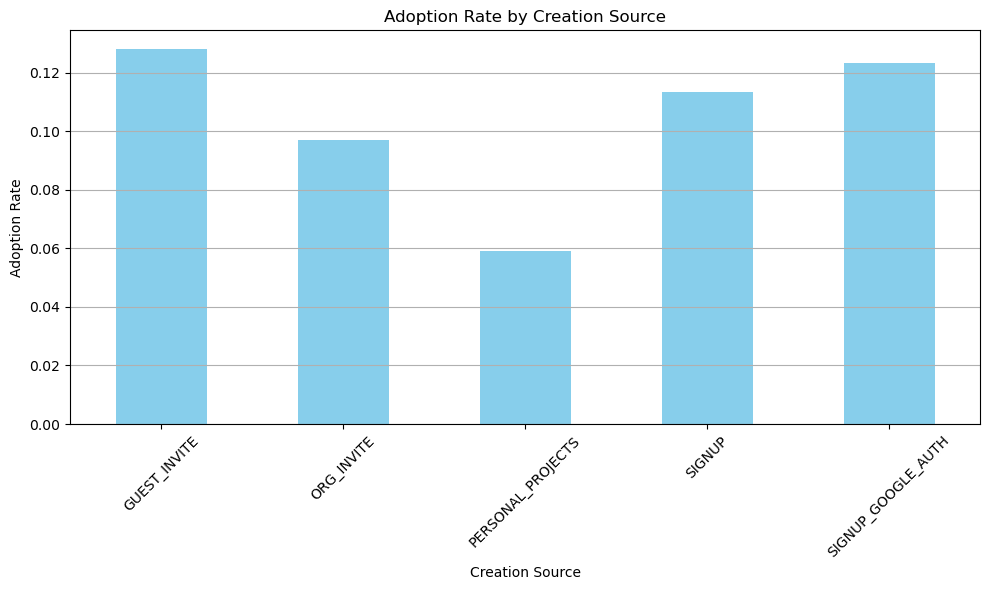

In [8]:
# Run the adopted_user function
users['adopted'] = users.apply(adopted_user, axis=1)

# Calculate adoption rate by creation source
adoption_by_creation_source = users.groupby('creation_source')['adopted'].mean()

# Plot adoption rate by creation source
plt.figure(figsize=(10, 6))
adoption_by_creation_source.plot(kind='bar', color='skyblue')
plt.title('Adoption Rate by Creation Source')
plt.xlabel('Creation Source')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### What this shows is that the adoption rate by creation source is influenced, in largest to smallest order:
### 1) GUEST_INVITE
### 2) SIGNUP_GOOGLE_AUTH
### 3) SIGNUP
### 4) ORG_INVITE
### 5) PERSONAL_PROJECTS